# Exemplo 2 da apresentação sobre Transformada Z
# slides 36 e 39

In [1]:
import numpy as np
import scipy
from scipy.signal import lfilter
import control
import math
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from control_utils import *

In [2]:
# Solução da equação recursiva
# solução exata -> x(k)
# x(0)=0; x(1)=0
# X(z)=1/(z^2-3z+2)
n = [1];
d = [1, -3, 2];


# Método da frações parciais de X(z)/z - Transformada Z inversa
# X(z)/z = 1/(z^3-3z^2+2z)
n_2 = n;
d_2 = d + [0];
r, p, k = scipy.signal.residue(n_2, d_2);

print("r = \n",r)
print("p = \n",p)

r = 
 [ 0.5 -1.   0.5]
p = 
 [0. 1. 2.]


[  0.   0.   1.   3.   7.  15.  31.  63. 127. 255. 511.]


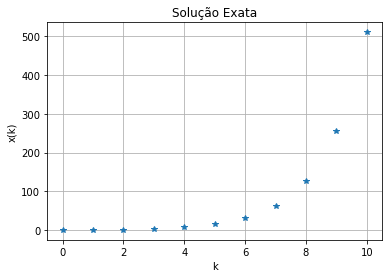

In [7]:
# solução exata
# TODO: these 0.5 and 1 comes from... the residue?
# x(k) = 0.5*delta(k) - 1*1^k + 0.5*2^k
k, u = delta(0, 10, 11)
x_exact = 0.5*u + -1*1**k + 0.5*2**k
print(x_exact)

plt.plot(k,x_exact,'*')
plt.title("Solução Exata")
plt.xlabel("k")
plt.ylabel("x(k)")
plt.grid(True)

[  0.   0.   1.   3.   7.  15.  31.  63. 127. 255. 511.]


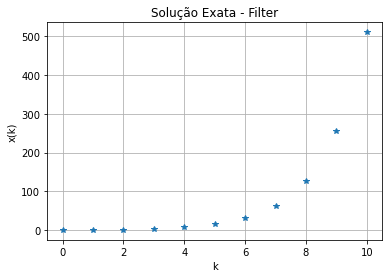

In [8]:
# Apply filter
n_negative, d_negative = z_positive_to_negative(n, d)
x_filter = lfilter(n_negative, d_negative, u)
assert_almost_equal(x_filter, x_exact)

print(x_filter)
plt.plot(k, x_filter, '*')
plt.title("Solução Exata - Filter")
plt.xlabel("k")
plt.ylabel("x(k)")
plt.grid(True)

xr = 
 [  0.   0.   1.   3.   7.  15.  31.  63. 127. 255. 511.]


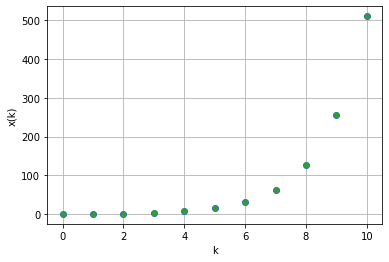

In [13]:
# comportamento de x(k) a partir da equação recursiva
# x(k+2)-3x(k+1)+2x(k)=u(k)
# u(k) = pulso unitário (delta(k))

# definição de vetores
xr = np.zeros(11);
# condições iniciais
xr[0] = 0;      # para k=0
xr[1] = 0;   

for j in range(0,9):
    xr[j+2] = u[j]+3*xr[j+1]-2*xr[j];
    
assert_almost_equal(xr, x_exact)
print("xr = \n",xr)

plt.plot(k,x_exact,'o', k,xr,'.', k, x_filter, '*')
plt.xlabel("k")
plt.ylabel("x(k)")
plt.grid(True)